In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

C:\Users\patri\Anaconda3\envs\mcts\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_excel("irt_frame.xlsx")

Die folgende Grafik zeigt je Studierendem (Y-Achse) und Aufgabe (X-Achse), ob die Aufgabe richtig beantwortet wurde. 
 Gelb: Richtig beantwortet 
 Rot: Aufgabe nicht gestellt 
 Schwarz: Falsche Antwort


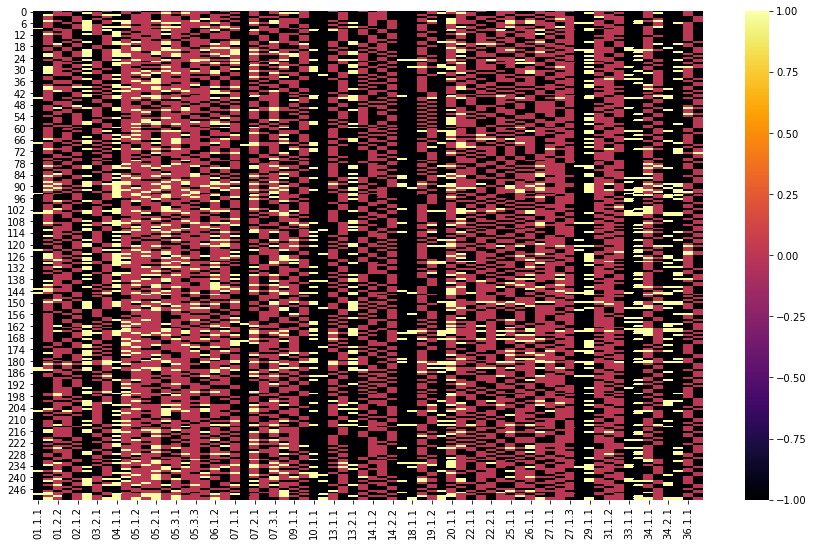

In [4]:
plt.figure(figsize=(15,9))
sns.heatmap(df, cmap="inferno")
print("Die folgende Grafik zeigt je Studierendem (Y-Achse) und Aufgabe (X-Achse), ob die Aufgabe richtig beantwortet wurde. \n Gelb: Richtig beantwortet \n Rot: Aufgabe nicht gestellt \n Schwarz: Falsche Antwort")

Die folgende Grafik zeigt die Lösungshäufigkeitje Aufgabe
 Gelb: Richtig beantwortet 
 Rot: Aufgabe nicht gestellt 
 Schwarz: Falsche Antwort


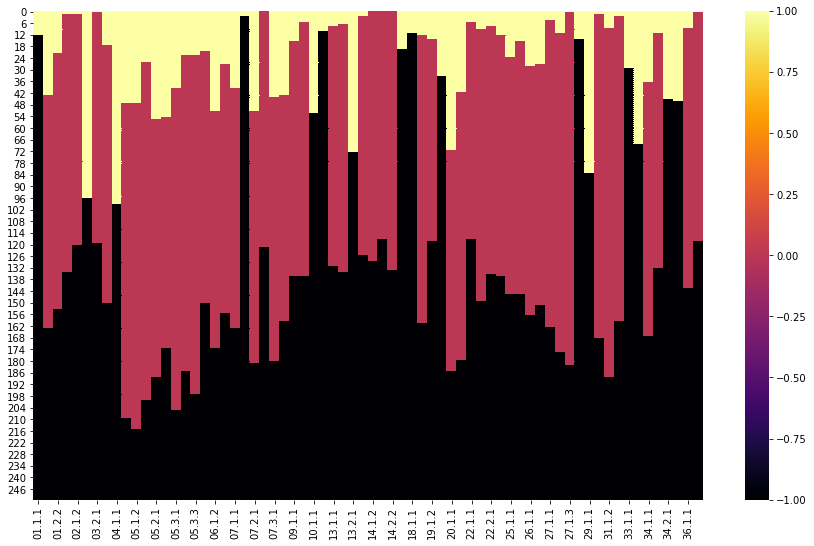

In [5]:
df0 = deepcopy(df)
for col in df0:
    df0[col] = df0[col].sort_values(ascending=False, ignore_index=True)
plt.figure(figsize=(15,9))
sns.heatmap(df0, cmap="inferno")
print("Die folgende Grafik zeigt die Lösungshäufigkeitje Aufgabe\n Gelb: Richtig beantwortet \n Rot: Aufgabe nicht gestellt \n Schwarz: Falsche Antwort")

<BarContainer object of 68 artists>

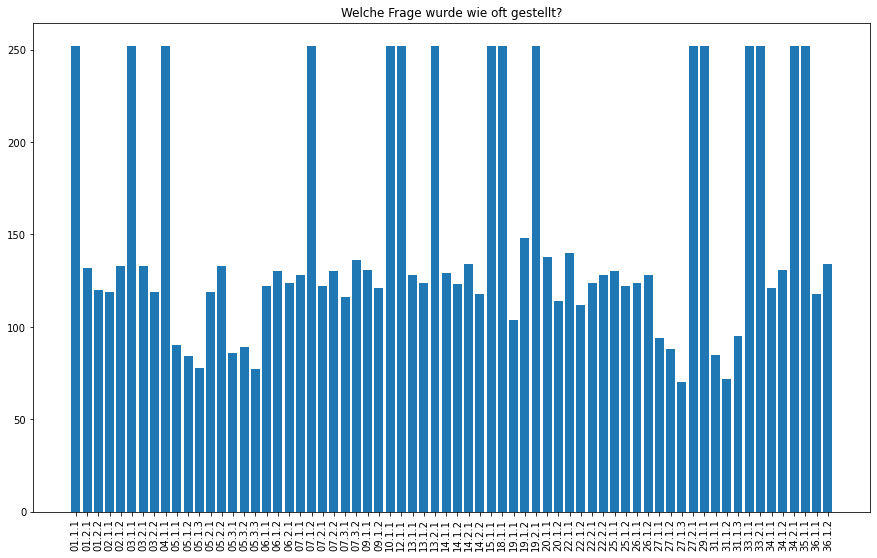

In [6]:
# Welche Frage wurde wie oft gestellt?
correct_answers = df[df==1].count()
wrong_answers = df[df==-1].count()
not_asked = df[df==0].count()
times_asked = correct_answers + wrong_answers
names = list(times_asked.index)
values = list(times_asked)
plt.figure(figsize=(15, 9))
plt.title("Welche Frage wurde wie oft gestellt?")
plt.xticks(rotation=90)
plt.bar(names, values)


<BarContainer object of 68 artists>

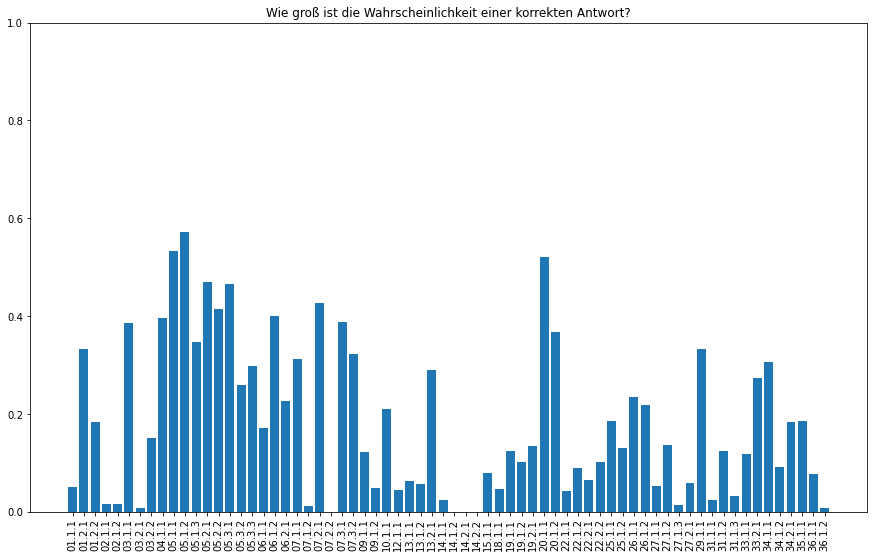

In [7]:

correct_answer_percent = correct_answers / (correct_answers + wrong_answers)
names = list(correct_answer_percent.index)
values = list(correct_answer_percent)
plt.figure(figsize=(15, 9))
plt.title("Wie groß ist die Wahrscheinlichkeit einer korrekten Antwort?")
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.bar(names, values)


40


<BarContainer object of 252 artists>

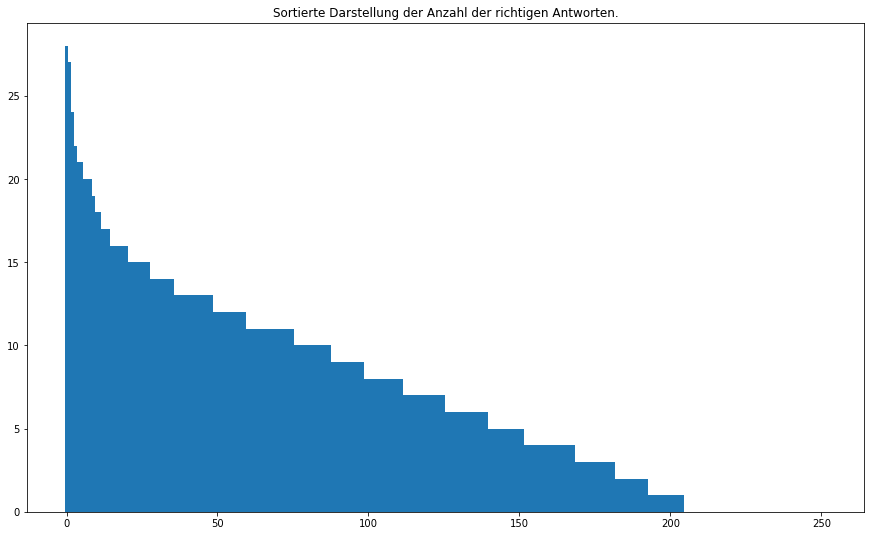

In [9]:
correct_answers_student = df[df==1].count(axis=1)
wrong_answers_student = df[df==-1].count(axis=1)
worked_questions = correct_answers_student + wrong_answers_student
correct_answer_percent_student = correct_answers_student / (correct_answers_student + wrong_answers_student)
print(min(worked_questions)) # Überprüfung ob wirklich allen Studenten sämtliche Fragen zugeordnet worden sind
sorted_df = correct_answers_student.sort_values(ascending=False)
names = list(sorted_df.index)
names = range(len(names))
values = list(sorted_df)
plt.figure(figsize=(15, 9))
plt.title("Sortierte Darstellung der Anzahl der richtigen Antworten.")
plt.bar(names, values, width=1)

(array([83., 57., 52., 39., 12.,  6.,  2.,  1.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

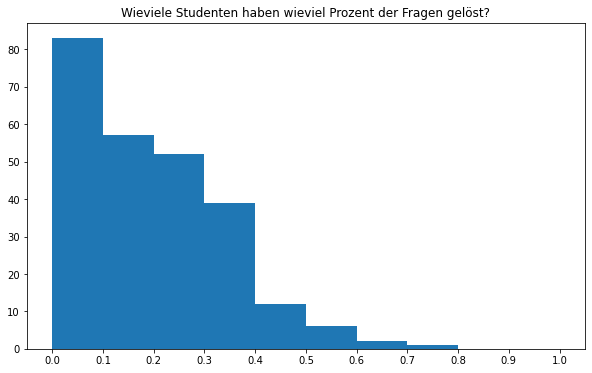

In [10]:
bins = [x/10 for x in range(11)]
plt.figure(figsize=(10, 6))
plt.title("Wieviele Studenten haben wieviel Prozent der Fragen gelöst?")
plt.xticks(bins)
plt.hist(correct_answer_percent_student, bins=bins)

In [11]:
print("Fragen die eine Antwortrate von weniger 20% haben:")
print(correct_answer_percent[correct_answer_percent < 0.2])

Fragen die eine Antwortrate von weniger 20% haben:
01.1.1    0.051587
01.2.2    0.183333
02.1.1    0.016807
02.1.2    0.015038
03.2.1    0.007519
03.2.2    0.151261
06.1.1    0.172131
07.1.2    0.011905
07.2.2    0.000000
09.1.1    0.122137
09.1.2    0.049587
12.1.1    0.043651
13.1.1    0.062500
13.1.2    0.056452
14.1.1    0.023256
14.1.2    0.000000
14.2.1    0.000000
14.2.2    0.000000
15.1.1    0.079365
18.1.1    0.047619
19.1.1    0.125000
19.1.2    0.101351
19.2.1    0.134921
22.1.1    0.042857
22.1.2    0.089286
22.2.1    0.064516
22.2.2    0.101562
25.1.1    0.184615
25.1.2    0.131148
27.1.1    0.053191
27.1.2    0.136364
27.1.3    0.014286
27.2.1    0.059524
31.1.1    0.023529
31.1.2    0.125000
31.1.3    0.031579
33.1.1    0.119048
34.1.2    0.091603
34.2.1    0.182540
35.1.1    0.186508
36.1.1    0.076271
36.1.2    0.007463
dtype: float64


In [12]:
print("Fragen die eine Antwortrate von höher 80% haben:")
print(correct_answer_percent[correct_answer_percent > 0.8])

Fragen die eine Antwortrate von höher 80% haben:
Series([], dtype: float64)


In [13]:
# Vergleich mit IRT
thetas = np.load("thetas_Klausur_2020.npy")
abcd = pd.read_csv("abcd_Klausur_2020.csv", index_col=0)

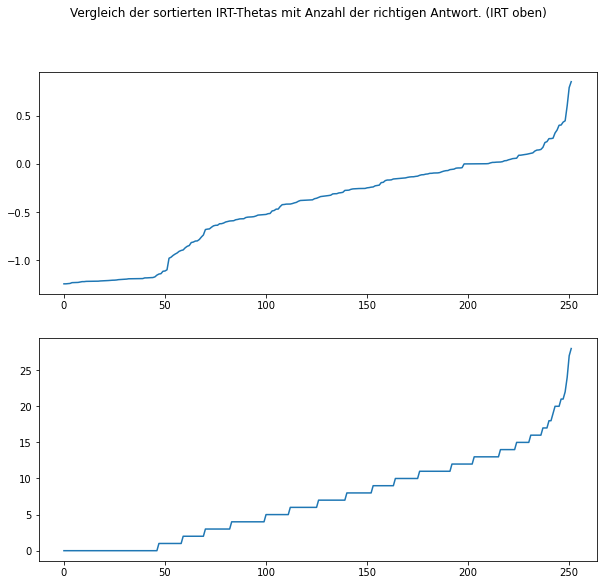

In [19]:
fig, axs = plt.subplots(2, figsize=(10,9))
fig.suptitle('Vergleich der sortierten IRT-Thetas mit Anzahl der richtigen Antwort. (IRT oben)')
axs[0].plot(np.sort(np.squeeze(thetas)))
axs[1].plot(np.sort(correct_answers_student.values))


In [14]:
c = pd.DataFrame([abcd["b"], correct_answer_percent])

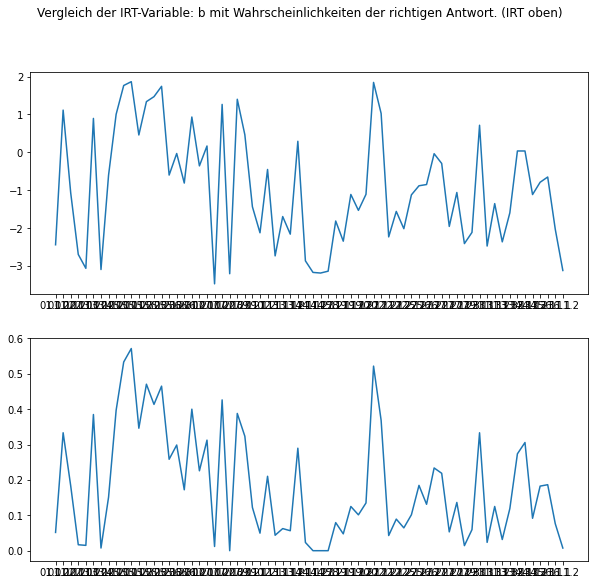

In [16]:
fig, axs = plt.subplots(2, figsize=(10,9))
fig.suptitle('Vergleich der IRT-Variable: b mit Wahrscheinlichkeiten der richtigen Antwort. (IRT oben)')
axs[0].plot(abcd["b"])
axs[1].plot(correct_answer_percent)


([<matplotlib.patches.Wedge at 0x1cb8d7dbd08>,
 [Text(0.9304834947446566, 0.5866860029076633, 'Richtige Antworten'),
  Text(-0.9304834398151448, -0.5866860900258126, 'Falsche Antworten')])

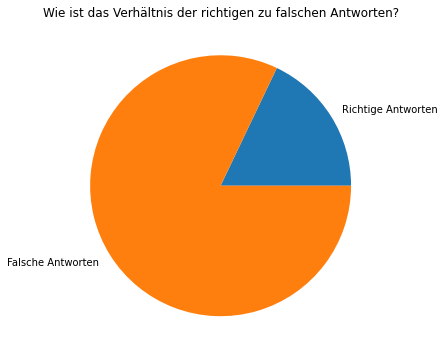

In [17]:
swa = sum(wrong_answers)
sca = sum(correct_answers)
plt.figure(figsize=(10, 6))
plt.title("Wie ist das Verhältnis der richtigen zu falschen Antworten?")
plt.pie([sca, swa], labels=(["Richtige Antworten", "Falsche Antworten"]))

In [18]:
abcd["b"].corr(correct_answer_percent)

0.9727061497275821

In [1]:
pd.Series(np.squeeze(thetas)).corr(pd.Series(correct_answers_student.values))



NameError: name 'pd' is not defined

In [ ]:
deviance = pd.read_excel("abweichung.xlsx", index_col="Unnamed: 0").T
deviance["R_Student"][deviance["R_Student"] == 0] = np.nan
deviance.head()

In [ ]:
from sklearn.cluster import KMeans
np.set_printoptions(precision=5, suppress=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


def grp_plot(x):
    print(f"Aufgabe: {x.name}, bearbeitet von {x.count()} Personen")
    x.hist()
    plt.show()
    if x.count() >= 20:
        km = KMeans()
        result = km.fit(x.dropna().values.reshape(-1,1))
        c_centers = pd.DataFrame(result.cluster_centers_)
        print("Per K-Means gefundene Fehlercluster:")
        c_centers["counts"] = pd.Series(km.predict(x.dropna().values.reshape(-1,1))).value_counts()
        print(c_centers)
        

In [2]:
#Hier wird die Faktor-Variante berechnet!

sorted_deviance = deviance.groupby("id").apply(lambda x: x["R_Muster"]/x["R_Student"])
sorted_deviance.groupby("id").apply(grp_plot) 

NameError: name 'deviance' is not defined